In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('netflix_dataset.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print(f'The data contains {df.shape[0]} rows and {df.shape[1]} columns')

The data contains 8807 rows and 12 columns


In [7]:
#change data type from object to datetime

df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

In [8]:
#Check data types

df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Rename column listed_in to genres

df=df.rename(columns={'listed_in':'genres'})

In [11]:
#Drop column description

df=df.drop('description',axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [12]:
# Check duplicates

df.duplicated().sum()

0

In [13]:
# Check null

df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
genres             0
dtype: int64

In [14]:
# Fill null on director col = 'Unavailable'

df['director'] = df['director'].fillna('Unavailable')

In [15]:
df.isna().sum().sort_values(ascending=False)

country         831
cast            825
date_added       98
rating            4
duration          3
show_id           0
type              0
title             0
director          0
release_year      0
genres            0
dtype: int64

In [16]:
# Drop null

df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7213 entries, 1 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7213 non-null   object        
 1   type          7213 non-null   object        
 2   title         7213 non-null   object        
 3   director      7213 non-null   object        
 4   cast          7213 non-null   object        
 5   country       7213 non-null   object        
 6   date_added    7213 non-null   datetime64[ns]
 7   release_year  7213 non-null   int64         
 8   rating        7213 non-null   object        
 9   duration      7213 non-null   object        
 10  genres        7213 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 676.2+ KB


In [18]:
# Print shape

print(f'The data contains {df.shape[0]} rows and {df.shape[1]} columns')

The data contains 7213 rows and 11 columns


# genres column

In [19]:
df.genres.sample(10)

8024      Comedies, International Movies, Romantic Movies
5455       Dramas, International Movies, Music & Musicals
4586             Action & Adventure, International Movies
559                                    Action & Adventure
1017                         Dramas, International Movies
655                Comedies, Dramas, International Movies
7112    Crime TV Shows, International TV Shows, TV Dramas
6565                                    Dramas, Thrillers
1847                           British TV Shows, Kids' TV
4938                                      Stand-Up Comedy
Name: genres, dtype: object

In [20]:
genres=df.genres.str.split(', ',expand=True)  # Split column
genres.dropna(how='all',axis=0,inplace=True)  # Drop nall rows
genres.columns=['gen1','gen2','gen3']         # rename cols
genres.head()

,gen1,gen2,gen3
1,International TV Shows,TV Dramas,TV Mysteries
4,International TV Shows,Romantic TV Shows,TV Comedies
7,Dramas,Independent Movies,International Movies
8,British TV Shows,Reality TV,None
9,Comedies,Dramas,None


In [21]:
# Fill null on genres col = 'Unavailable'

genres.fillna('Unavailable',inplace=True)

In [22]:
genres.isna().sum()

gen1    0
gen2    0
gen3    0
dtype: int64

In [23]:
# Concat cols in one column

genres=pd.concat([genres.gen1,genres.gen2,genres.gen3],ignore_index=True)
genres

0        International TV Shows
1        International TV Shows
2                        Dramas
3              British TV Shows
4                      Comedies
                  ...          
21634                 Thrillers
21635                 Thrillers
21636               Unavailable
21637               Unavailable
21638          Music & Musicals
Length: 21639, dtype: object

In [24]:
# Filter genres

genres=genres[genres!='Unavailable']


# Cast column

In [25]:
df.cast.sample(10)

5159    Jeff Daniels, Michelle Dockery, Jack O'Connell...
6416    Jean-Michel Correia, Yasin Houicha, Pedro Casa...
2460    Nabila Ebeid, Mahmoud Hemeida, Hanan Turk, Han...
5295                                                Anand
8552    Russell Crowe, Olga Kurylenko, Yılmaz Erdoğan,...
2073    Tia Mowry-Hardrict, Jackée Harry, Tamera Mowry...
2111    Cecilia Roth, Miguel Ángel Solá, Benjamín Amad...
7150    Amy Adams, Embeth Davidtz, Ben McKenzie, Aless...
1621    Tom Selleck, Laura San Giacomo, Alan Rickman, ...
2531    Vanesha Prescilla, Iqbaal Ramadhan, Debo Andry...
Name: cast, dtype: object

In [26]:
cast=df.cast.str.split(', ',expand=True)  # Split column
cast.dropna(how='all',axis=1,inplace=True)  # Drop nall cols
cast.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Kofi Ghanaba,Oyafunmike Ogunlano,Alexandra Duah,Nick Medley,Mutabaruka,Afemo Omilami,Reggie Carter,Mzuri,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Mel Giedroyc,Sue Perkins,Mary Berry,Paul Hollywood,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Melissa McCarthy,Chris O'Dowd,Kevin Kline,Timothy Olyphant,Daveed Diggs,Skyler Gisondo,Laura Harrier,Rosalind Chao,Kimberly Quinn,Loretta Devine,...,None,None,None,None,None,None,None,None,None,None


In [27]:
# Fill null on cast col = 'Unavailable'

cast.fillna('Unavailable',inplace=True)

In [29]:
cast_cols = [str(x) for x in range(0,50) ]   # creat list cols_name
cast.columns=cast_cols                            # rename cols to cast_cols
cast=pd.concat([cast[col] for col in cast_cols],ignore_index=True)  # Concat cols in one column

cast

0               Ama Qamata
1               Mayur More
2             Kofi Ghanaba
3             Mel Giedroyc
4         Melissa McCarthy
                ...       
360645         Unavailable
360646         Unavailable
360647         Unavailable
360648         Unavailable
360649         Unavailable
Length: 360650, dtype: object

In [30]:
# Filter cast

cast=cast[cast!='Unavailable']
cast.value_counts()

Anupam Kher         43
Shah Rukh Khan      34
Naseeruddin Shah    31
Om Puri             30
Akshay Kumar        30
                    ..
Heidi Lee            1
Rance Howard         1
Ji-won Uhm           1
Jugal Hansraj        1
Ayize Ma'at          1
Name: count, Length: 34013, dtype: int64

In [31]:
df.drop(['cast','genres'], axis=1, inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration'],
      dtype='object')

# Visualization

In [32]:
pivot_table = df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)
pivot_table.tail(22)

type,Movie,TV Show
release_year,,
2000,32,4
2001,39,4
2002,44,6
2003,50,7
2004,54,7
2005,65,10
2006,80,13
2007,71,11
2008,112,18


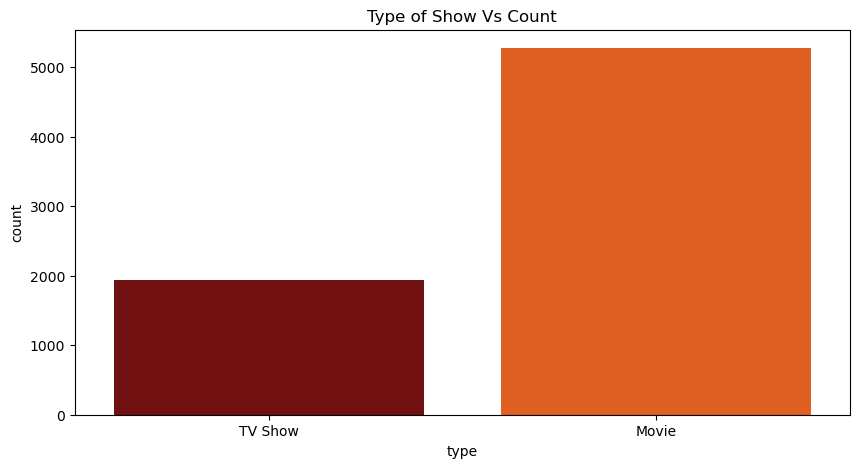

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df, palette='gist_heat')
plt.title('Type of Show Vs Count')
plt.show()

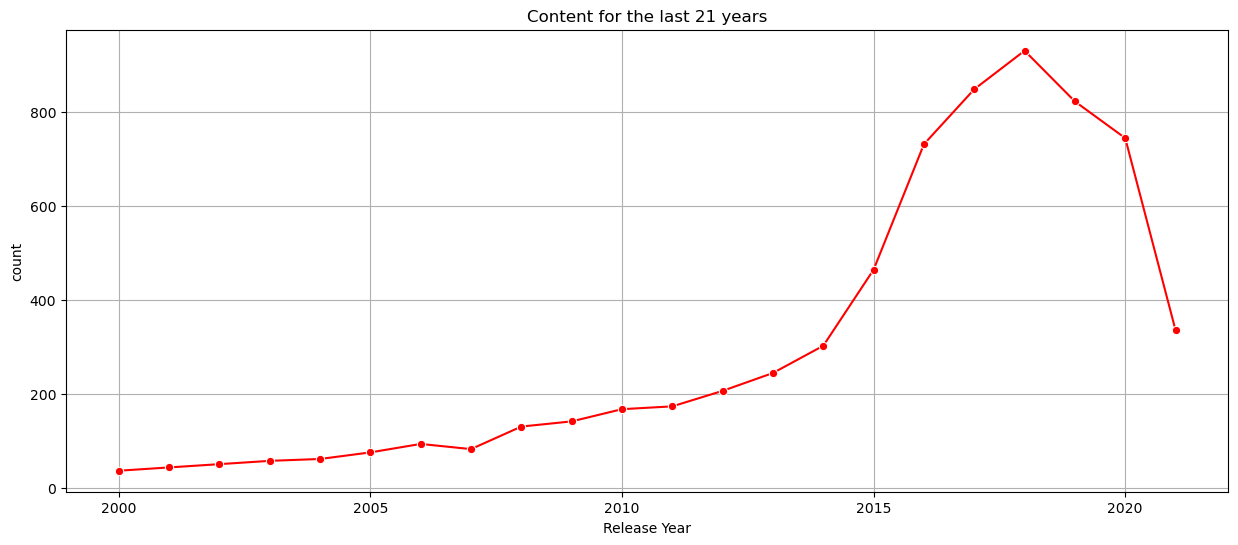

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df['release_year'].value_counts().sort_index().tail(22), marker='o', color='r')
plt.title('Content for the last 21 years')
plt.xlabel('Release Year')
plt.grid()
plt.show()

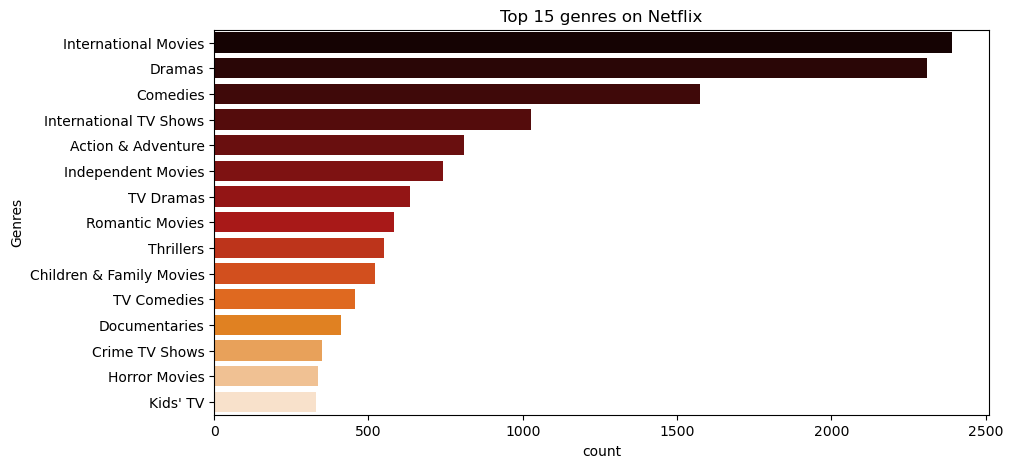

In [34]:
order=genres.value_counts()

plt.figure(figsize=(10,5))
sns.countplot(y=genres,order=order.index[0:15], palette='gist_heat')
plt.title('Top 15 genres on Netflix')
plt.ylabel('Genres')
plt.show()

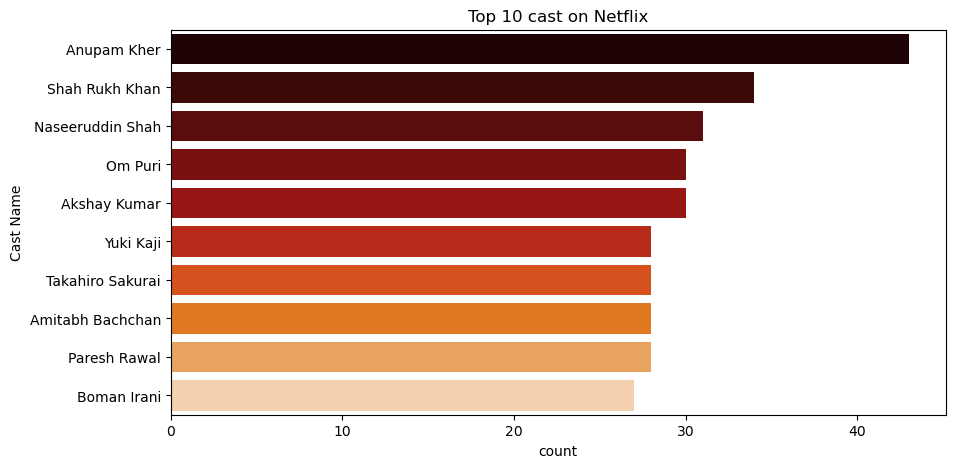

In [35]:
order=cast.value_counts()

plt.figure(figsize=(10,5))
sns.countplot(y=cast,order=order.index[0:10], palette='gist_heat')
plt.title('Top 10 cast on Netflix')
plt.ylabel('Cast Name')
plt.show()

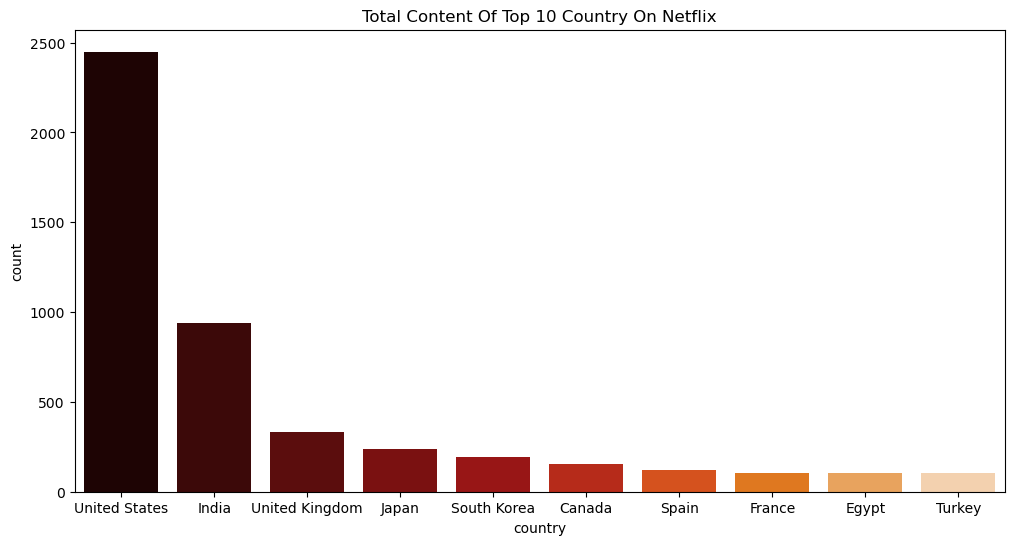

In [36]:
total_top_10_country = df['country'].value_counts()[0:10].index

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='country', order=total_top_10_country, palette='gist_heat')
plt.title('Total Content Of Top 10 Country On Netflix')
plt.show()

In [37]:
df.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration
1,s2,TV Show,Blood & Water,Unavailable,South Africa,2021-09-24,2021,TV-MA,2 Seasons
4,s5,TV Show,Kota Factory,Unavailable,India,2021-09-24,2021,TV-MA,2 Seasons


In [38]:
data_movie = df[df['type']=='Movie']
data_TV_Show = df[df['type']=='TV Show']

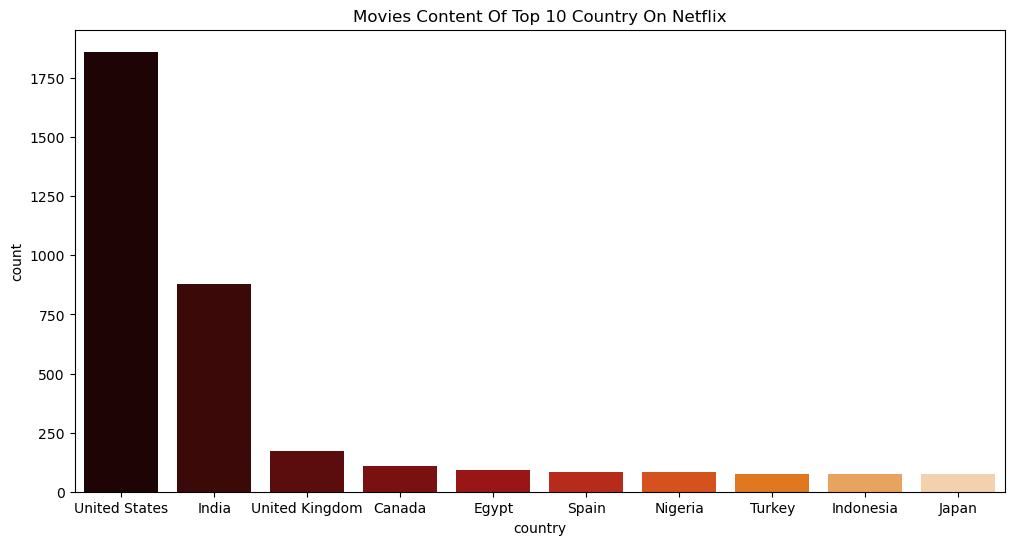

In [39]:
top_10_country_movie = data_movie['country'].value_counts()[0:10].index

plt.figure(figsize=(12,6))
sns.countplot(data=data_movie, x='country', order=top_10_country_movie, palette='gist_heat')
plt.title('Movies Content Of Top 10 Country On Netflix')
plt.show()

In [40]:
# best movie director 

best_movie_director=data_movie['director'].value_counts()
print(f'The Director who has directed the most films is "{best_movie_director.index[1]}", Who has directed {best_movie_director[1]} films')

The Director who has directed the most films is "Raúl Campos, Jan Suter", Who has directed 18 films


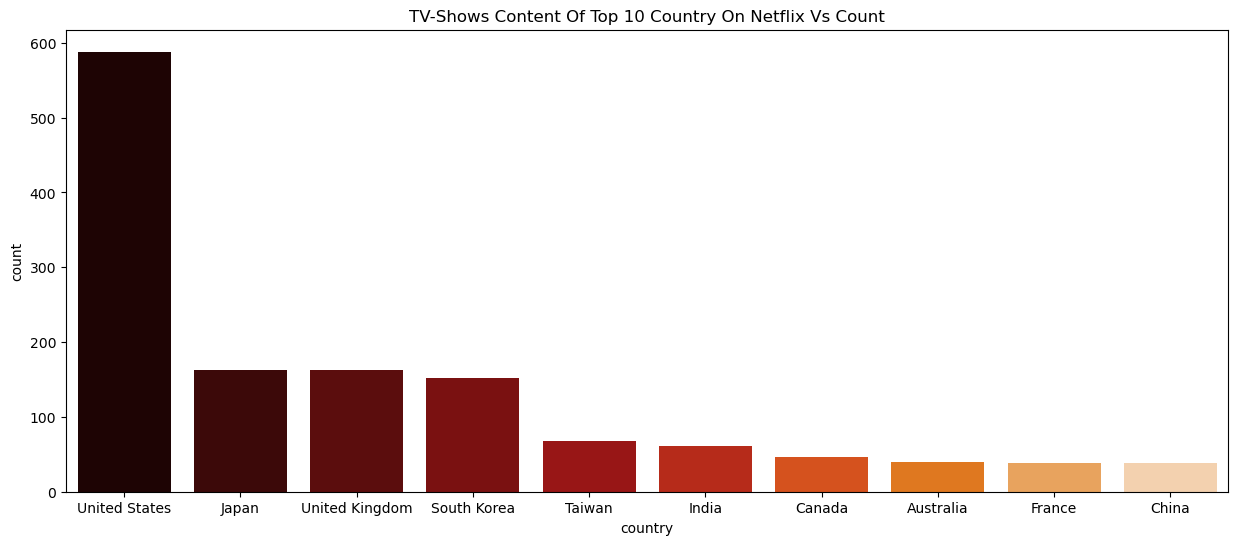

In [41]:
top_10_country_show = data_TV_Show['country'].value_counts()[0:10].index

plt.figure(figsize=(15,6))
sns.countplot(data=data_TV_Show, x='country', order=top_10_country_show, palette='gist_heat')
plt.title('TV-Shows Content Of Top 10 Country On Netflix Vs Count')
plt.show()

In [42]:
# best TV-Shows director

best_TV_show_director=data_TV_Show['director'].value_counts()
print(f'The Director who has directed the most TV-Shows is "{best_TV_show_director.index[1]}", Who has directed {best_TV_show_director[1]} TV-Shows')

The Director who has directed the most TV-Shows is "Alastair Fothergill", Who has directed 3 TV-Shows


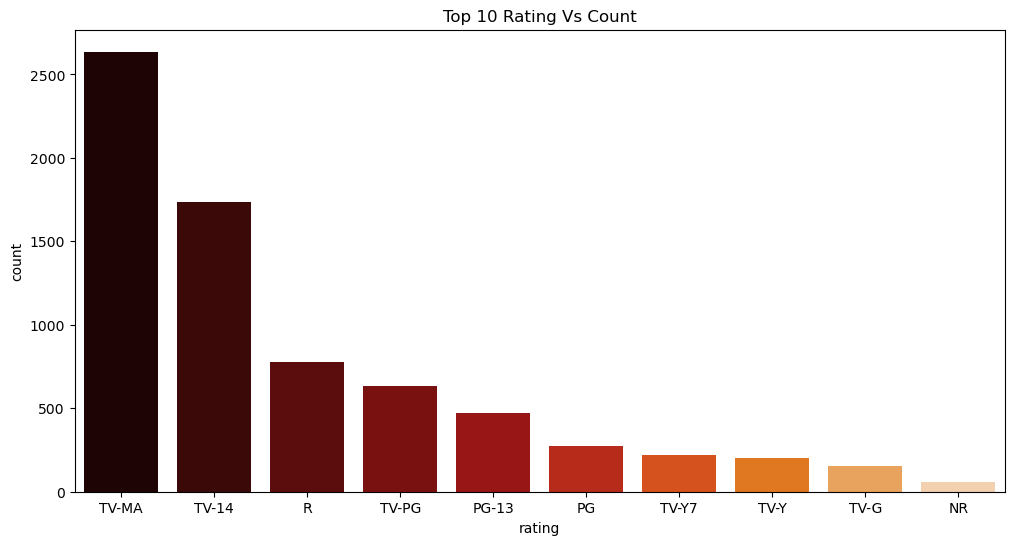

In [43]:
top_rating = df.rating.value_counts().index[:10]

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', order=top_rating, palette='gist_heat')
plt.title('Top 10 Rating Vs Count')
plt.show()

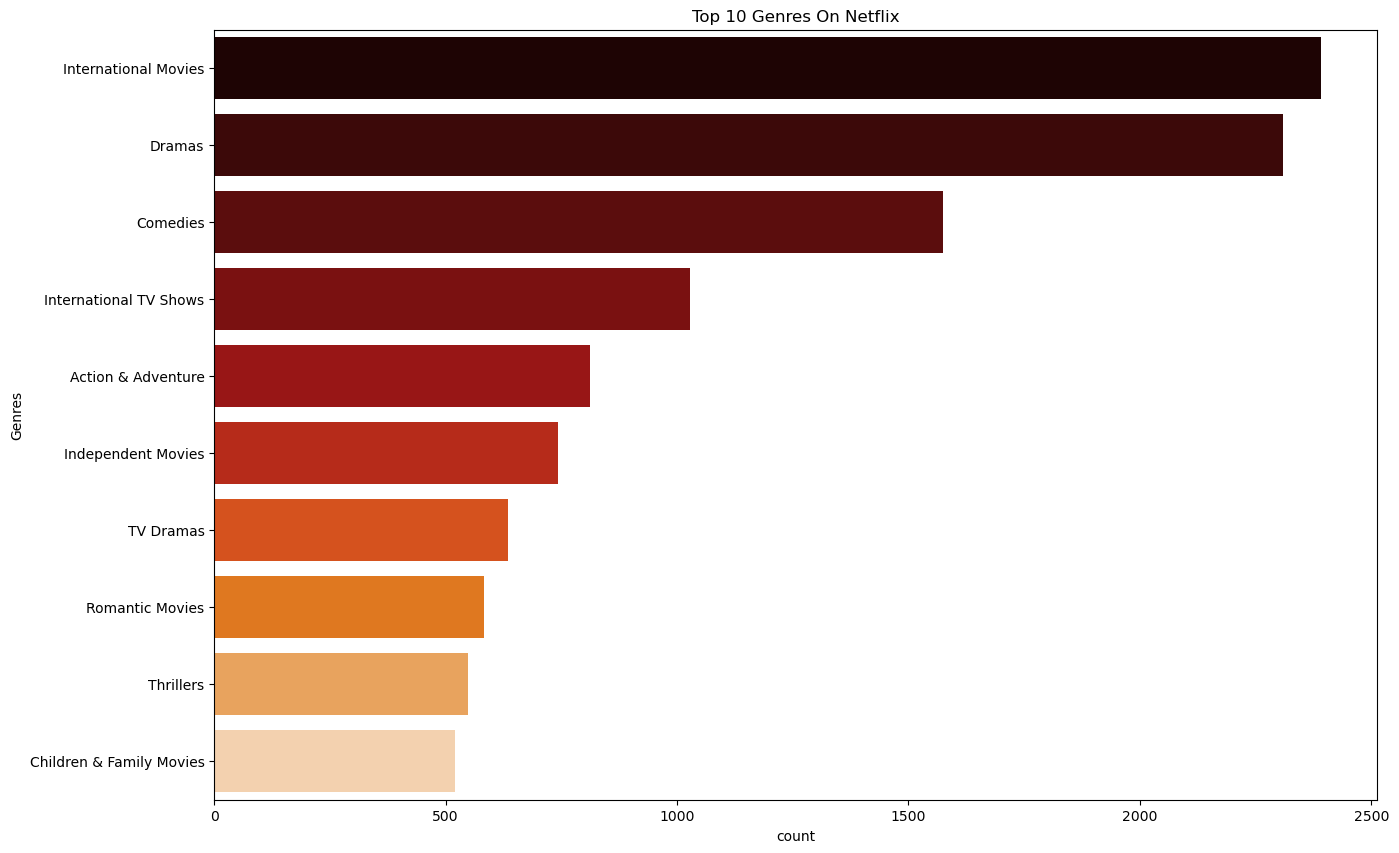

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(y=genres, order=genres.value_counts().index[:10], palette='gist_heat')
plt.title('Top 10 Genres On Netflix')
plt.ylabel('Genres')
plt.show()

In [46]:
#df.to_csv('netflix.csv')
#genres.to_csv('genres_column_netflix.csv')
#cast.to_csv('casts_column_netflix.csv')